# Churn Rate Analysis  

### Used Libiraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set_context('poster')
plt.style.use('seaborn-v0_8-colorblind')


### Import Dataset

In [3]:
data = pd.read_csv(r"D:\NTI Scolarship\Final Project\WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Exploring Data

### Column Descriptions

- **customerID :**	Unique identifier for each customer.
- **gender :**	Gender of the customer (Male/Female).
- **SeniorCitizen :**	Whether the customer is a senior citizen (1 = Yes, 0 = No).
- **Partner :**	Whether the customer has a partner (Yes/No).
- **Dependents :**	Whether the customer has dependents (Yes/No).
- **tenure :**	Number of months the customer has stayed with the company.
- **PhoneService :**	Whether the customer has a phone service (Yes/No).
- **MultipleLines :**	Whether the customer has multiple phone lines.
- **InternetService :**	Type of internet service (DSL, Fiber optic, No).
- **OnlineSecurity :**	Whether the customer has online security service (Yes/No/No internet).
- **OnlineBackup :**	Whether the customer has online backup service (Yes/No/No internet).
- **DeviceProtection :**	Whether the customer has device protection (Yes/No/No internet).
- **TechSupport :**	Whether the customer has tech support (Yes/No/No internet).
- **StreamingTV :**	Whether the customer has streaming TV service (Yes/No/No internet).
- **StreamingMovies :**	Whether the customer has streaming movie service (Yes/No/No internet).
- **Contract :**	Type of contract (Month-to-month, One year, Two year).
- **PaperlessBilling :**	Whether the customer has paperless billing (Yes/No).
- **PaymentMethod :**	How the customer pays (Electronic check, Mailed check, Bank transfer, Credit card).
- **MonthlyCharges :**	Monthly amount charged to the customer.
- **TotalCharges :**	Total amount charged to the customer.
- **Churn :**	Whether the customer left the service (Yes/No).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
data.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.70,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.20,No


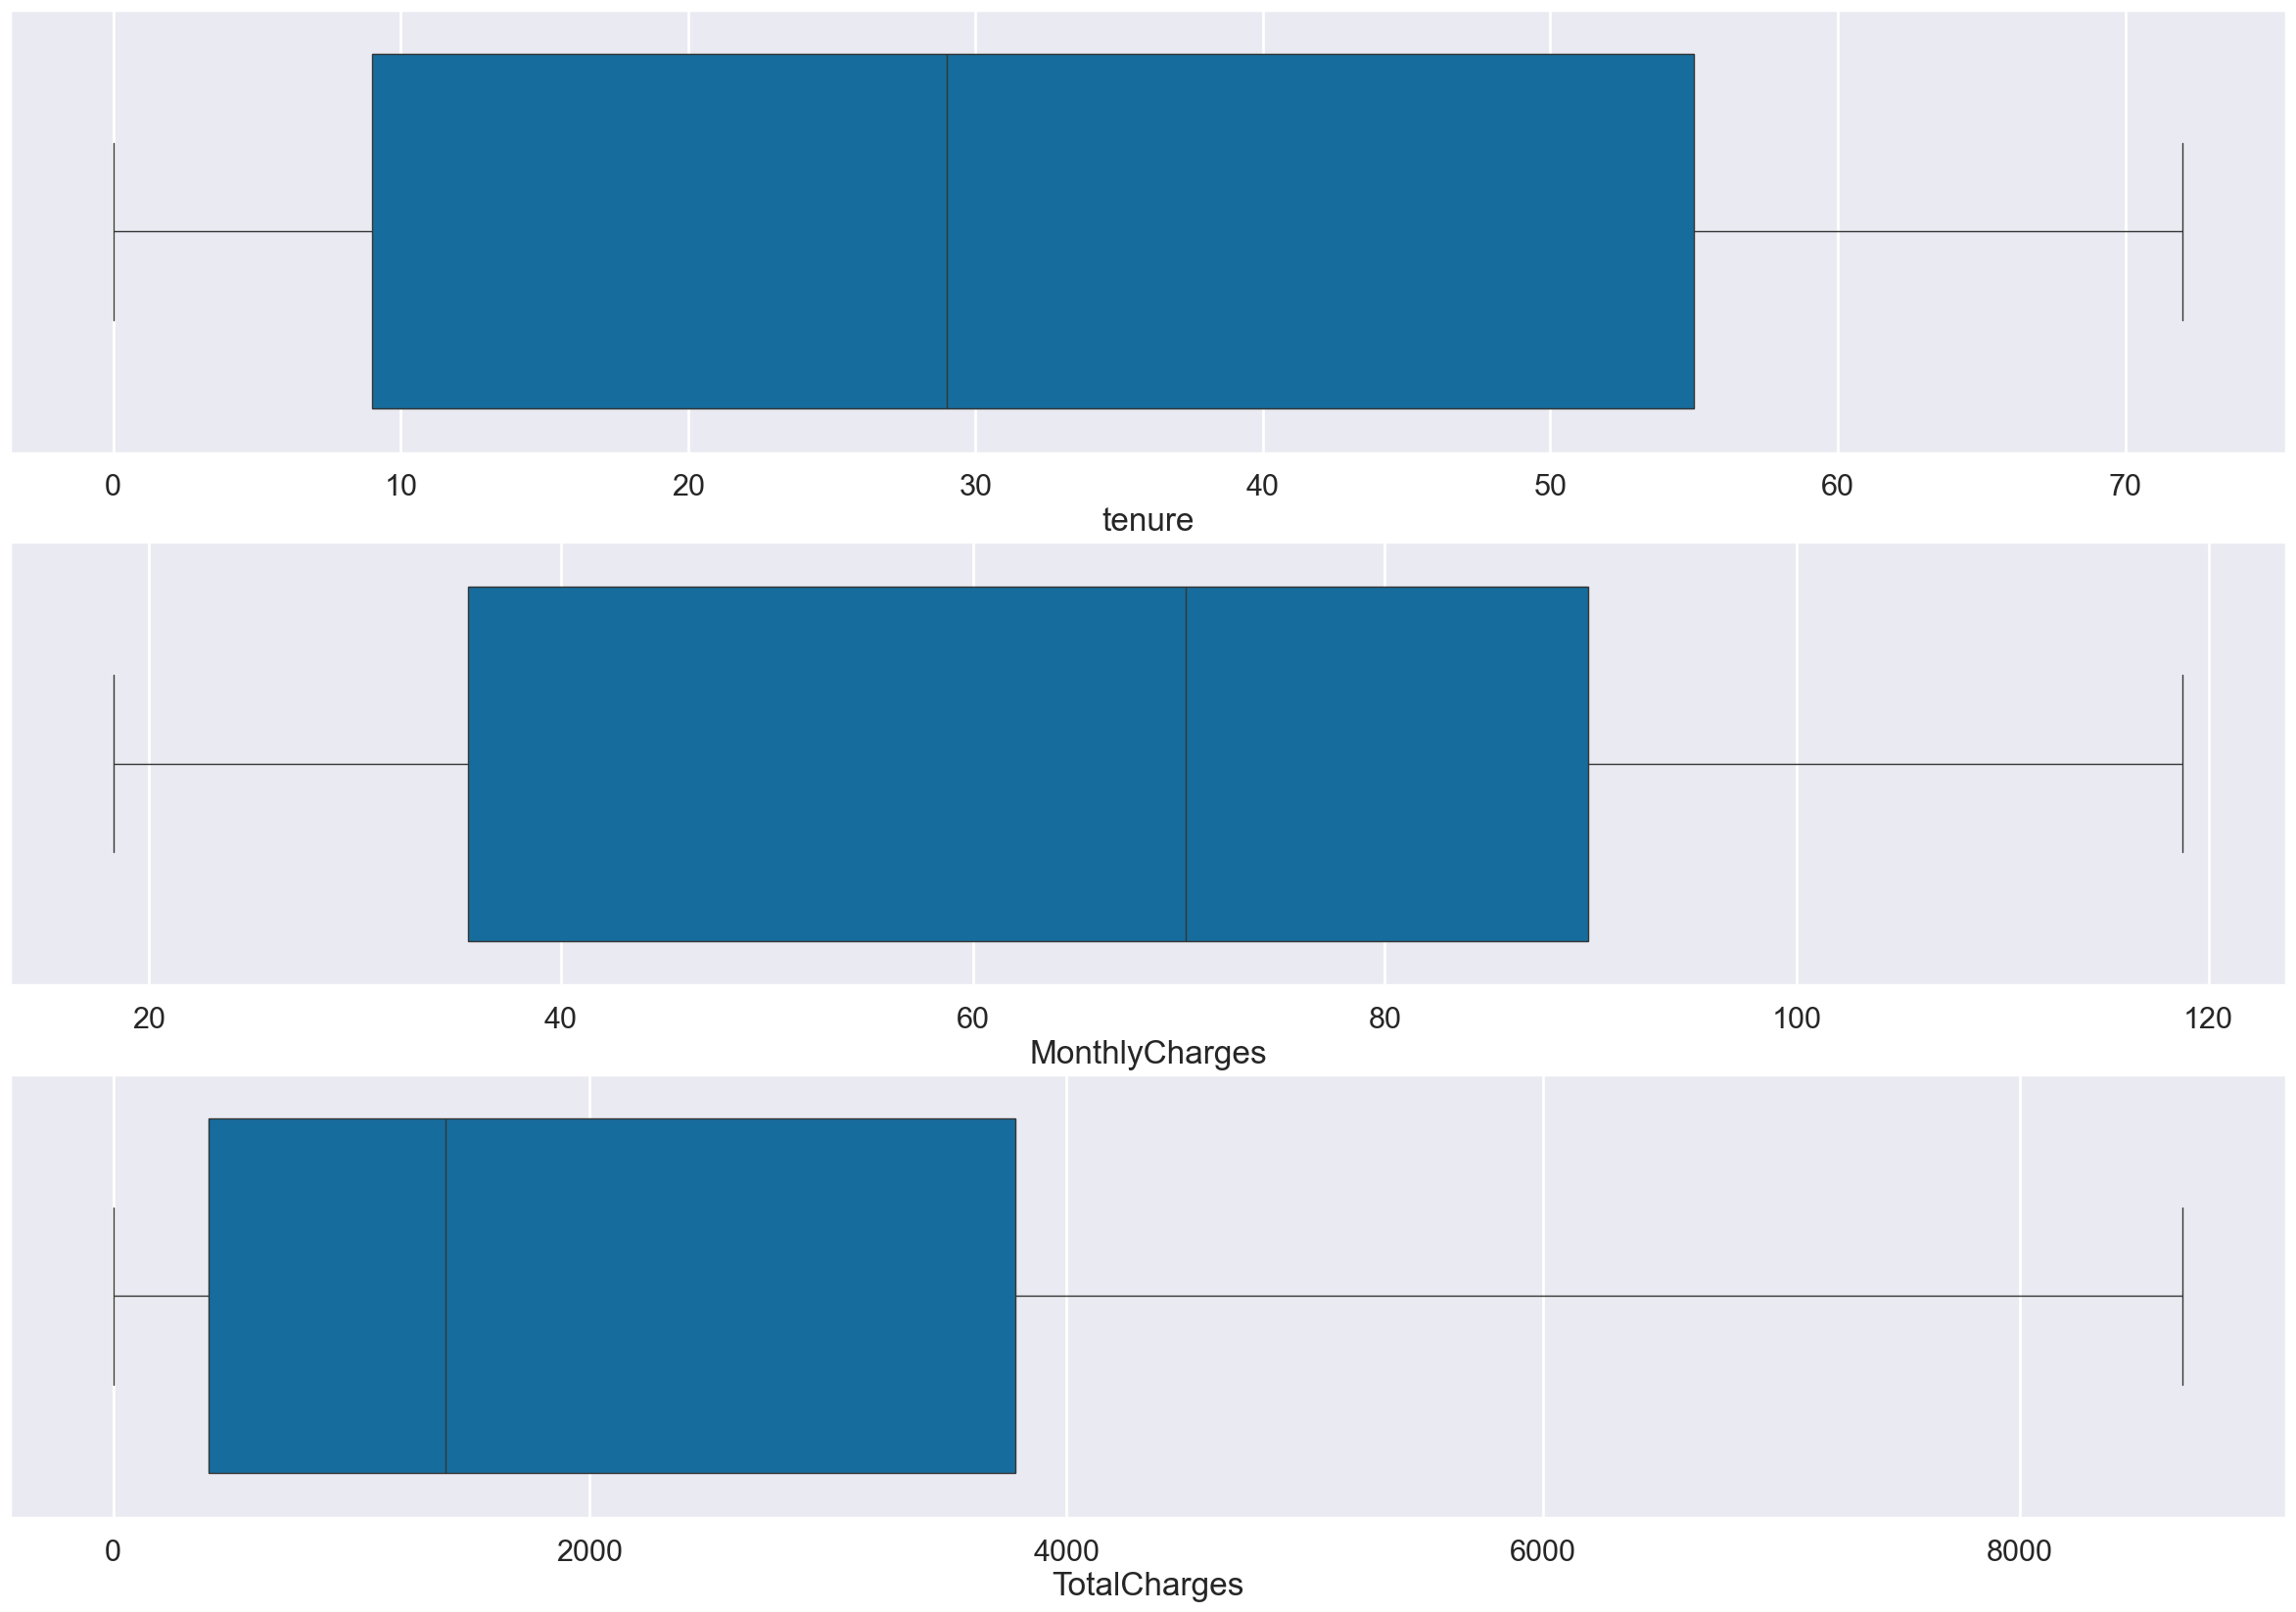

In [9]:
fig,(tenure_ax,MonthlyCharges_ax,TotalCharges_ax) = plt.subplots(3,sharey= True,figsize = (30,20))
sns.boxplot(x = data['tenure'],ax=tenure_ax);
sns.boxplot(x = data['MonthlyCharges'],ax=MonthlyCharges_ax);
sns.boxplot(x = data['TotalCharges'],ax=TotalCharges_ax);


## Data Cleaning

In [10]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No',1:'Yes'}) # replace 0 by No and 1 by Yes

In [11]:
col = data.columns

In [12]:
# to get all unique values
for i in col :
    print(f"{i} unique values are : ",data[i].unique())

customerID unique values are :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values are :  ['Female' 'Male']
SeniorCitizen unique values are :  ['No' 'Yes']
Partner unique values are :  ['Yes' 'No']
Dependents unique values are :  ['No' 'Yes']
tenure unique values are :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values are :  ['No' 'Yes']
MultipleLines unique values are :  ['No phone service' 'No' 'Yes']
InternetService unique values are :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values are :  ['No' 'Yes' 'No internet service']
OnlineBackup unique values are :  ['Yes' 'No' 'No internet service']
DeviceProtection unique values are :  ['No' 'Yes' 'No internet service']
TechSupport unique values are :  ['No' 'Yes' 'No internet s

In [13]:
data.replace('No internet service','No', inplace=True)

In [14]:
# to check  all unique values again
for i in col :
    print(f"{i} unique values are : ",data[i].unique())

customerID unique values are :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values are :  ['Female' 'Male']
SeniorCitizen unique values are :  ['No' 'Yes']
Partner unique values are :  ['Yes' 'No']
Dependents unique values are :  ['No' 'Yes']
tenure unique values are :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values are :  ['No' 'Yes']
MultipleLines unique values are :  ['No phone service' 'No' 'Yes']
InternetService unique values are :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values are :  ['No' 'Yes']
OnlineBackup unique values are :  ['Yes' 'No']
DeviceProtection unique values are :  ['No' 'Yes']
TechSupport unique values are :  ['No' 'Yes']
StreamingTV unique values are :  ['No' 'Yes']
StreamingMovies unique values are

In [15]:
data['MultipleLines'] = data['MultipleLines'].str.replace('No phone service','No')

In [16]:
data['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
data['PaymentMethod'] = data['PaymentMethod'].str.replace('Credit card (automatic)','Bank transfer (automatic)')

In [18]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)'],
      dtype=object)

In [19]:
# to check  all unique values after cleaning
for i in col :
    print(f"{i} unique values are : ",data[i].unique())

customerID unique values are :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values are :  ['Female' 'Male']
SeniorCitizen unique values are :  ['No' 'Yes']
Partner unique values are :  ['Yes' 'No']
Dependents unique values are :  ['No' 'Yes']
tenure unique values are :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values are :  ['No' 'Yes']
MultipleLines unique values are :  ['No' 'Yes']
InternetService unique values are :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values are :  ['No' 'Yes']
OnlineBackup unique values are :  ['Yes' 'No']
DeviceProtection unique values are :  ['No' 'Yes']
TechSupport unique values are :  ['No' 'Yes']
StreamingTV unique values are :  ['No' 'Yes']
StreamingMovies unique values are :  ['No' 'Yes']
Co

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
data.to_csv("Cleaned_Customer_Churn_Data.csv",index = False)

## Key Analysis Insights

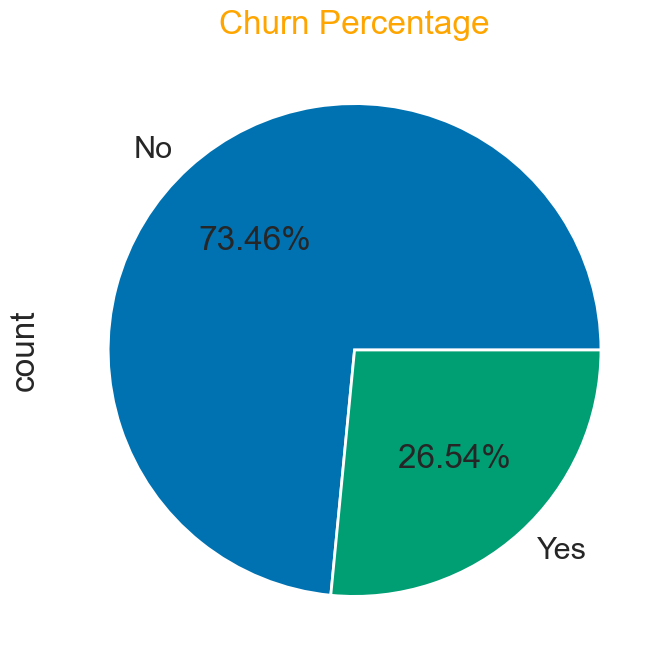

In [85]:
plt.figure(figsize=(20,8))
plt.title('Churn Percentage',fontdict={'color':'orange'})

data['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%');

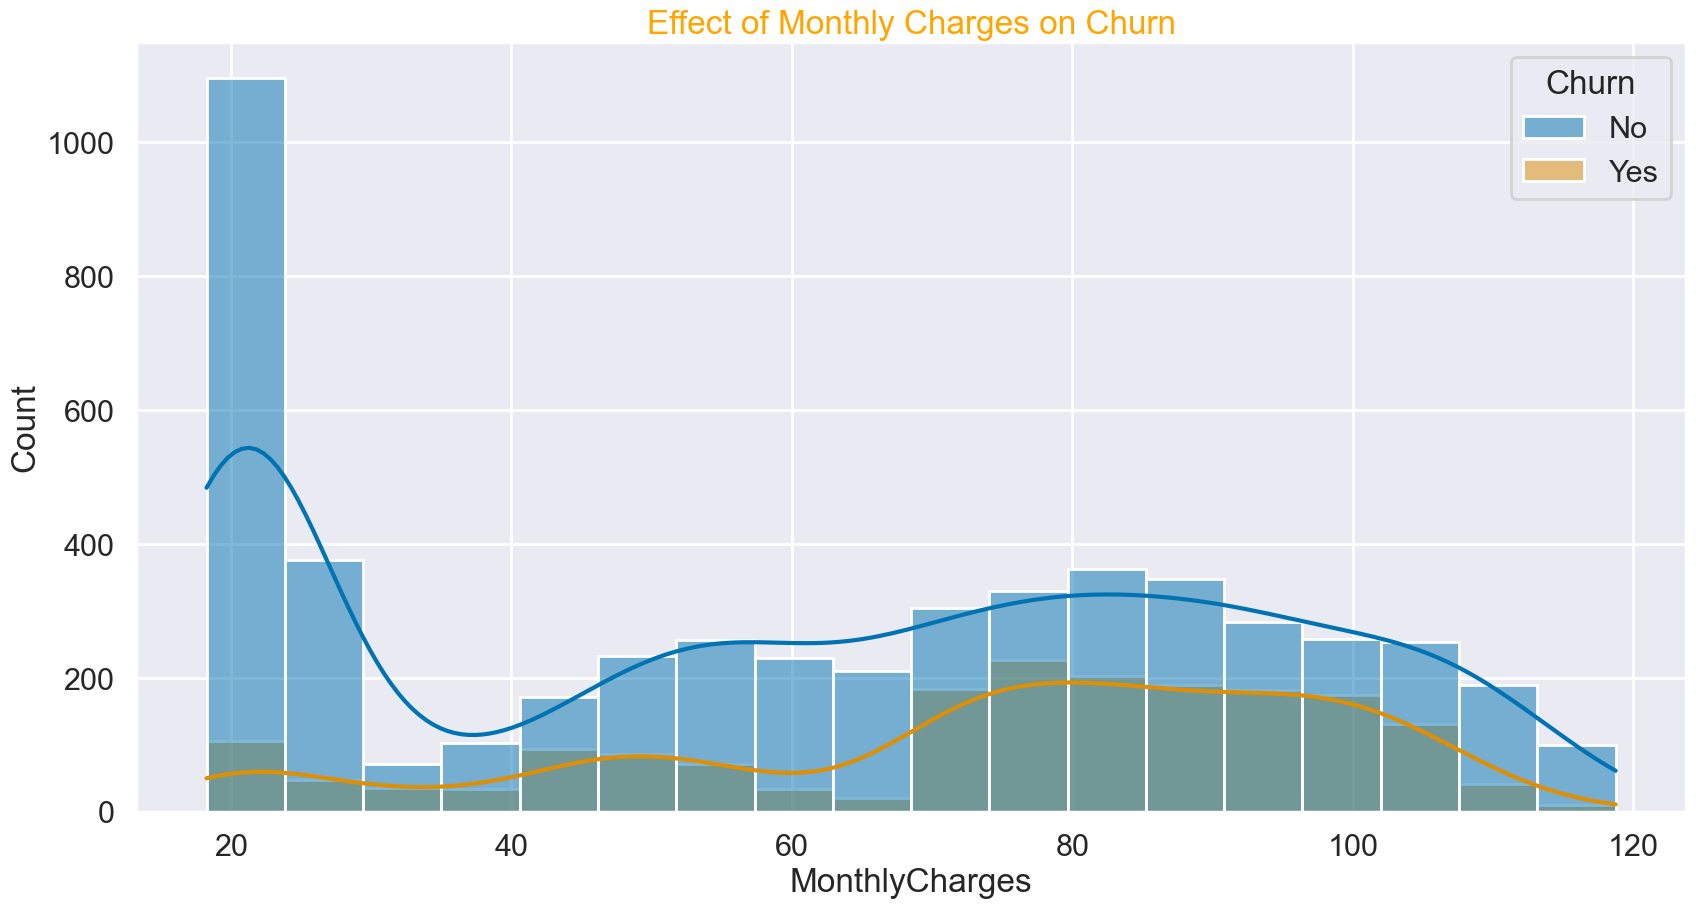

In [81]:
plt.figure(figsize=(20,10))
plt.title('Effect of Monthly Charges on Churn',fontdict={'color':'orange'})
sns.histplot(x=data['MonthlyCharges'],hue=data['Churn'],kde=True,palette='colorblind');

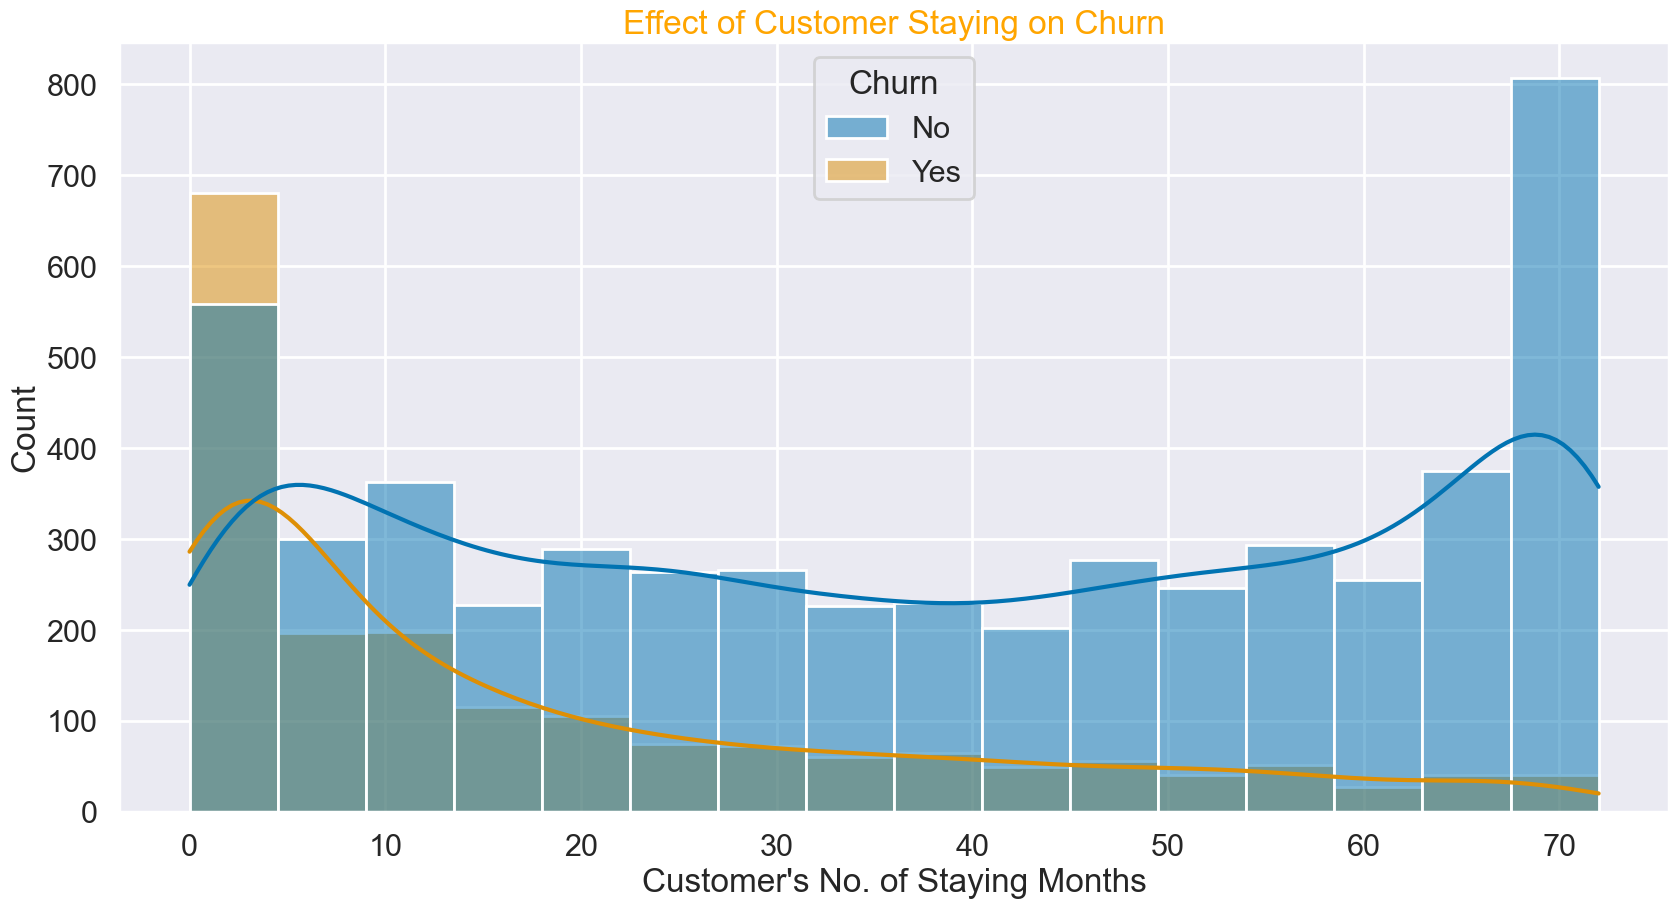

In [80]:
plt.figure(figsize=(20,10))
plt.title('Effect of Customer Staying on Churn',fontdict={'color':'orange'})
plt.xlabel("Customer's No. of Staying Months")
sns.histplot(x=data['tenure'],hue=data['Churn'],kde=True,palette='colorblind');

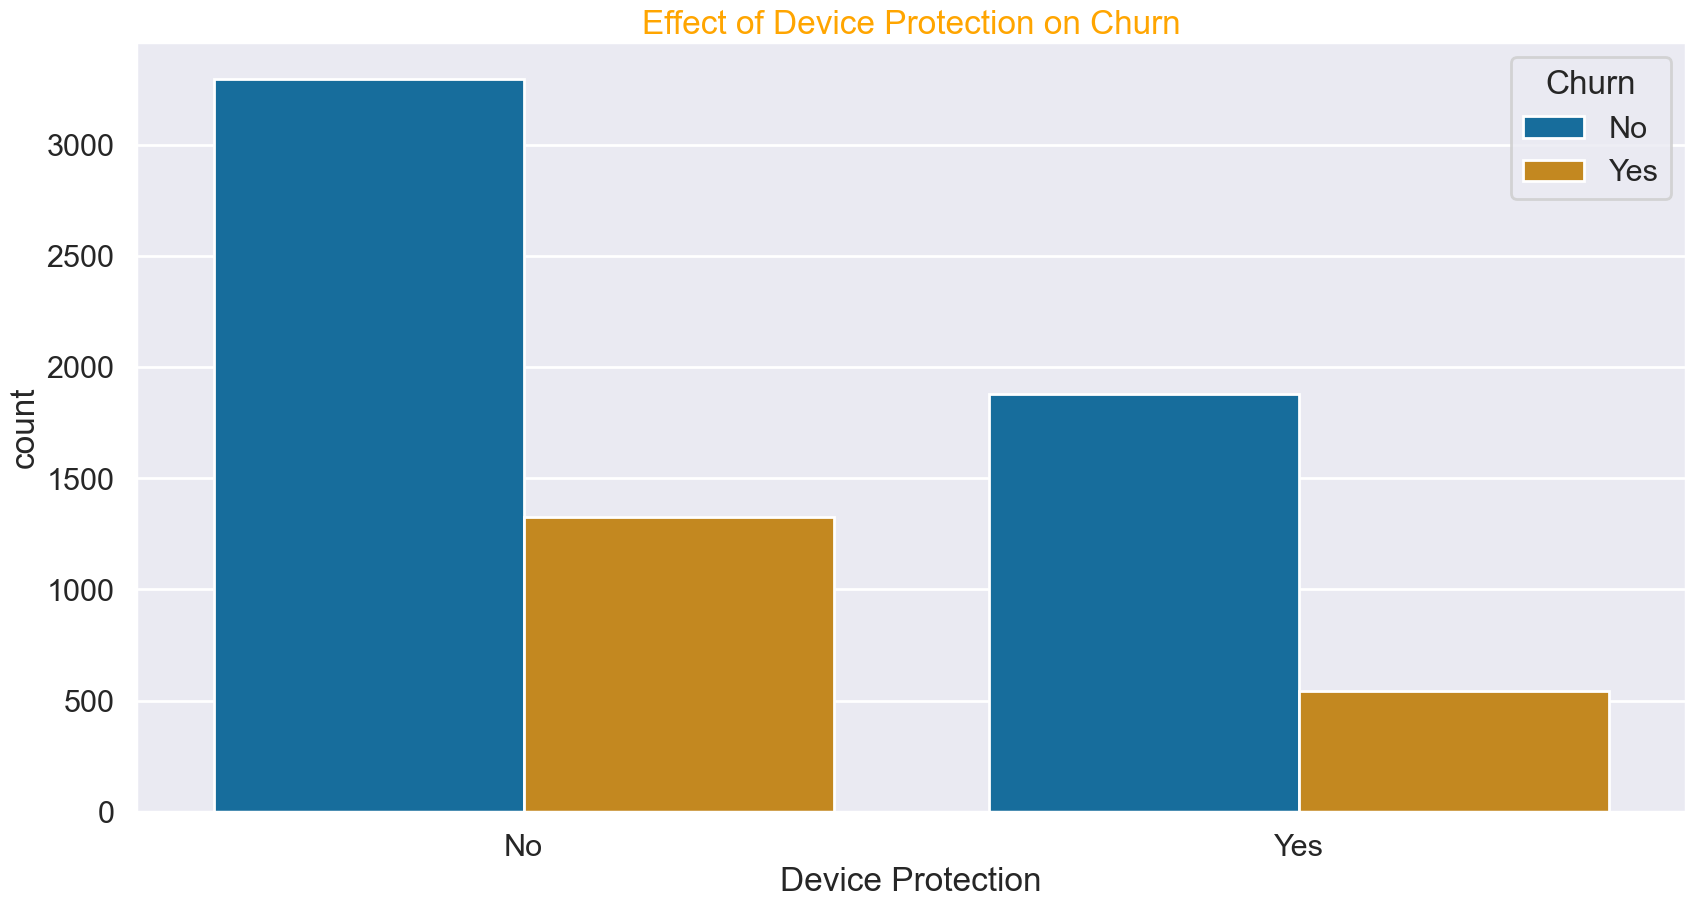

In [79]:
plt.figure(figsize=(20,10))
plt.title('Effect of Device Protection on Churn',fontdict={'color':'orange'})
plt.xlabel("Device Protection")
sns.countplot(x=data['DeviceProtection'],hue=data['Churn'],palette='colorblind');

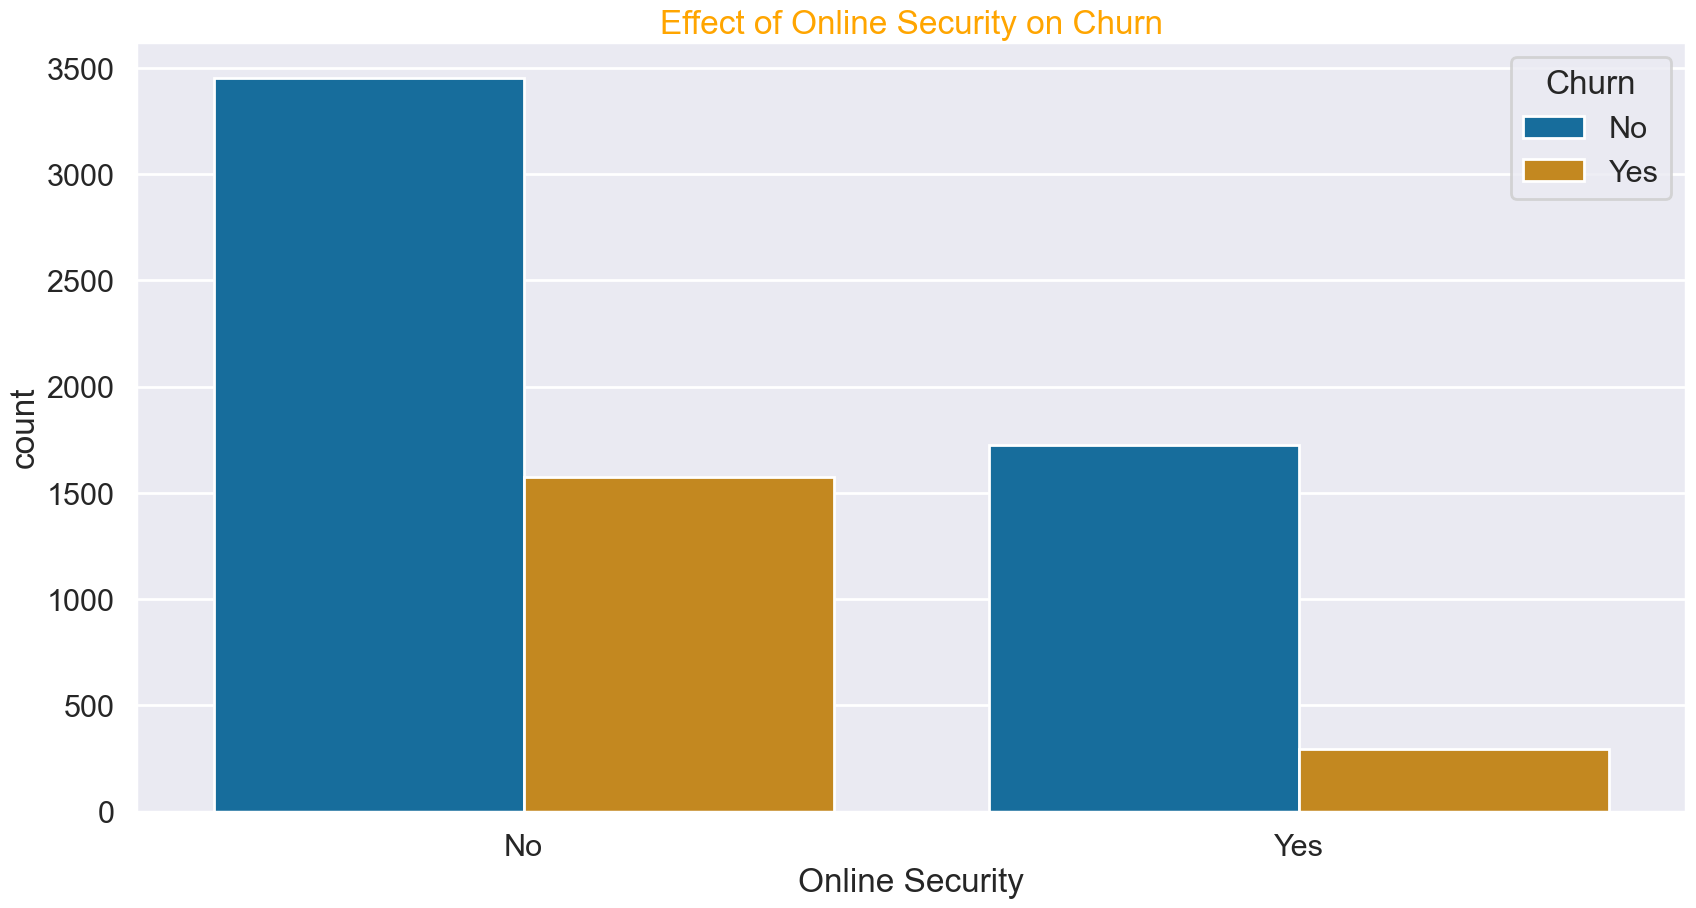

In [78]:
plt.figure(figsize=(20,10))
plt.title('Effect of Online Security on Churn',fontdict={'color':'orange'})
plt.xlabel("Online Security")
sns.countplot(x=data['OnlineSecurity'],hue=data['Churn'],palette='colorblind');

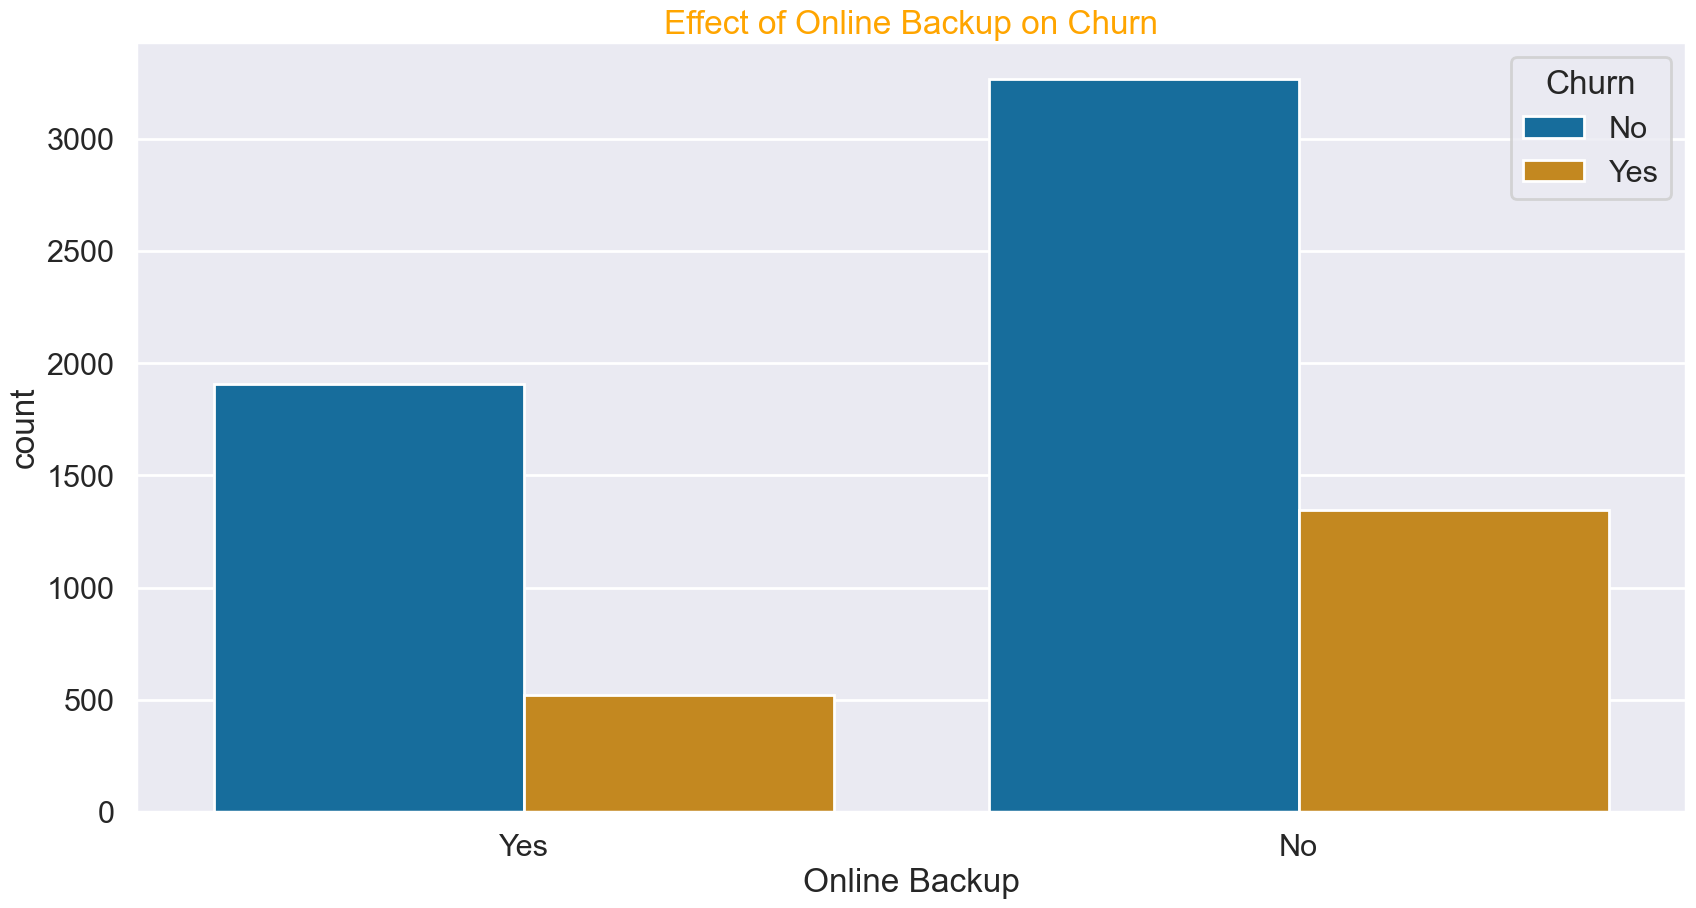

In [77]:
plt.figure(figsize=(20,10))
plt.title('Effect of Online Backup on Churn',fontdict={'color':'orange'})
plt.xlabel("Online Backup")
sns.countplot(x=data['OnlineBackup'],hue=data['Churn'],palette='colorblind');

In [69]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

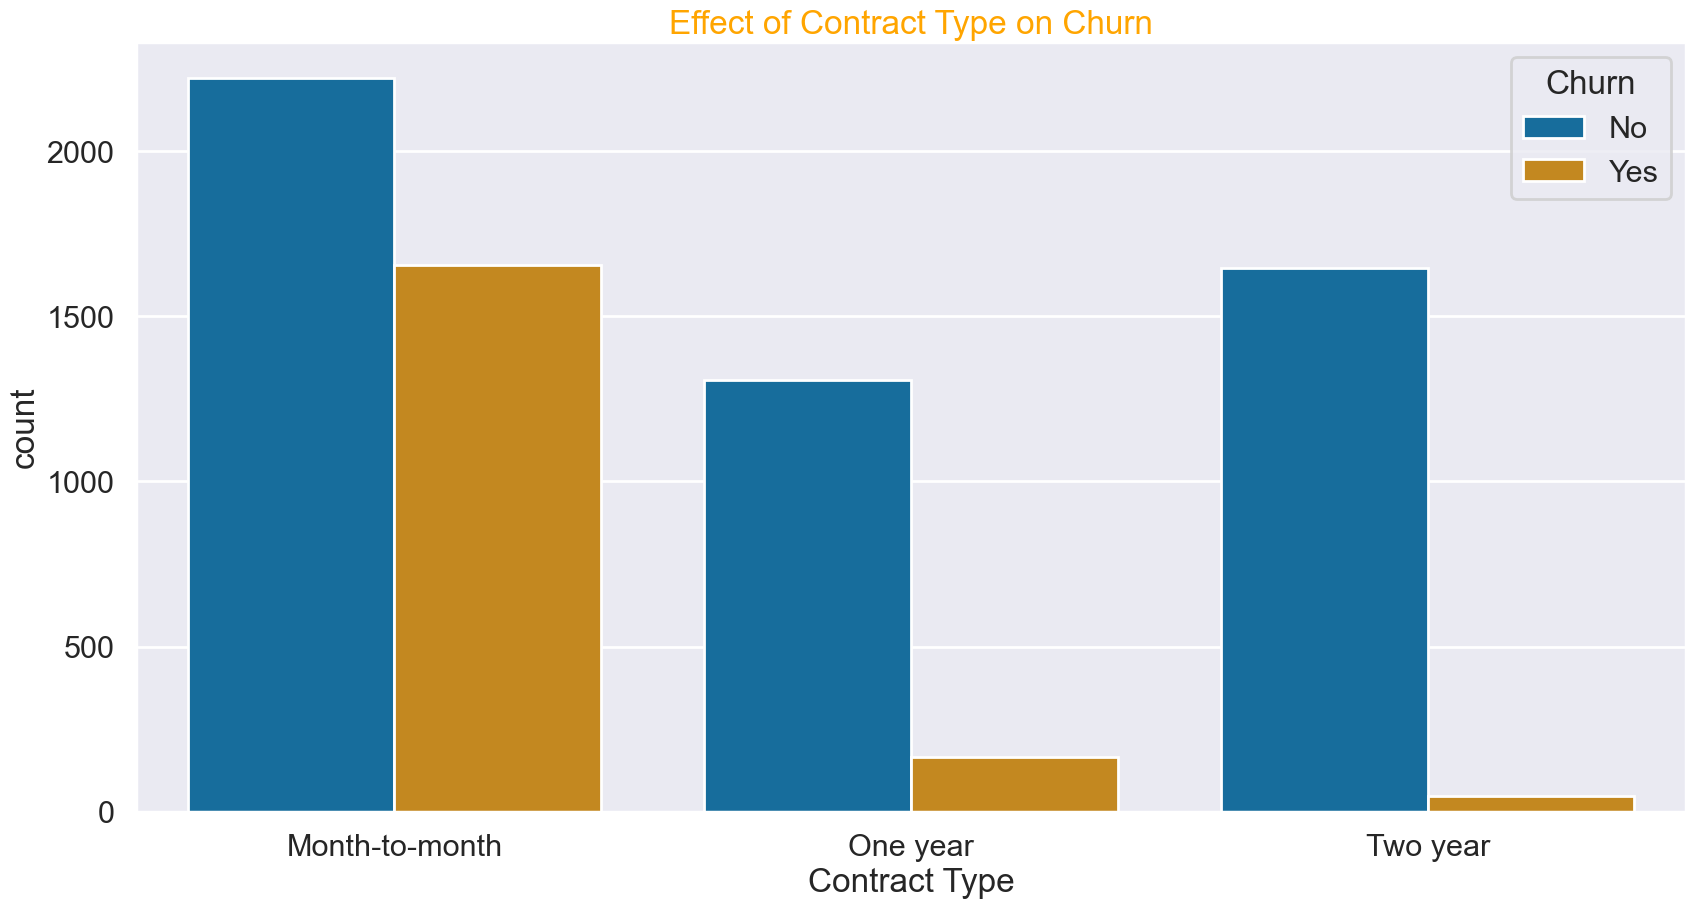

In [75]:
plt.figure(figsize=(20,10))
plt.title('Effect of Contract Type on Churn',fontdict={'color':'orange'})
plt.xlabel("Contract Type")
sns.countplot(x=data['Contract'],hue=data['Churn'],palette='colorblind');

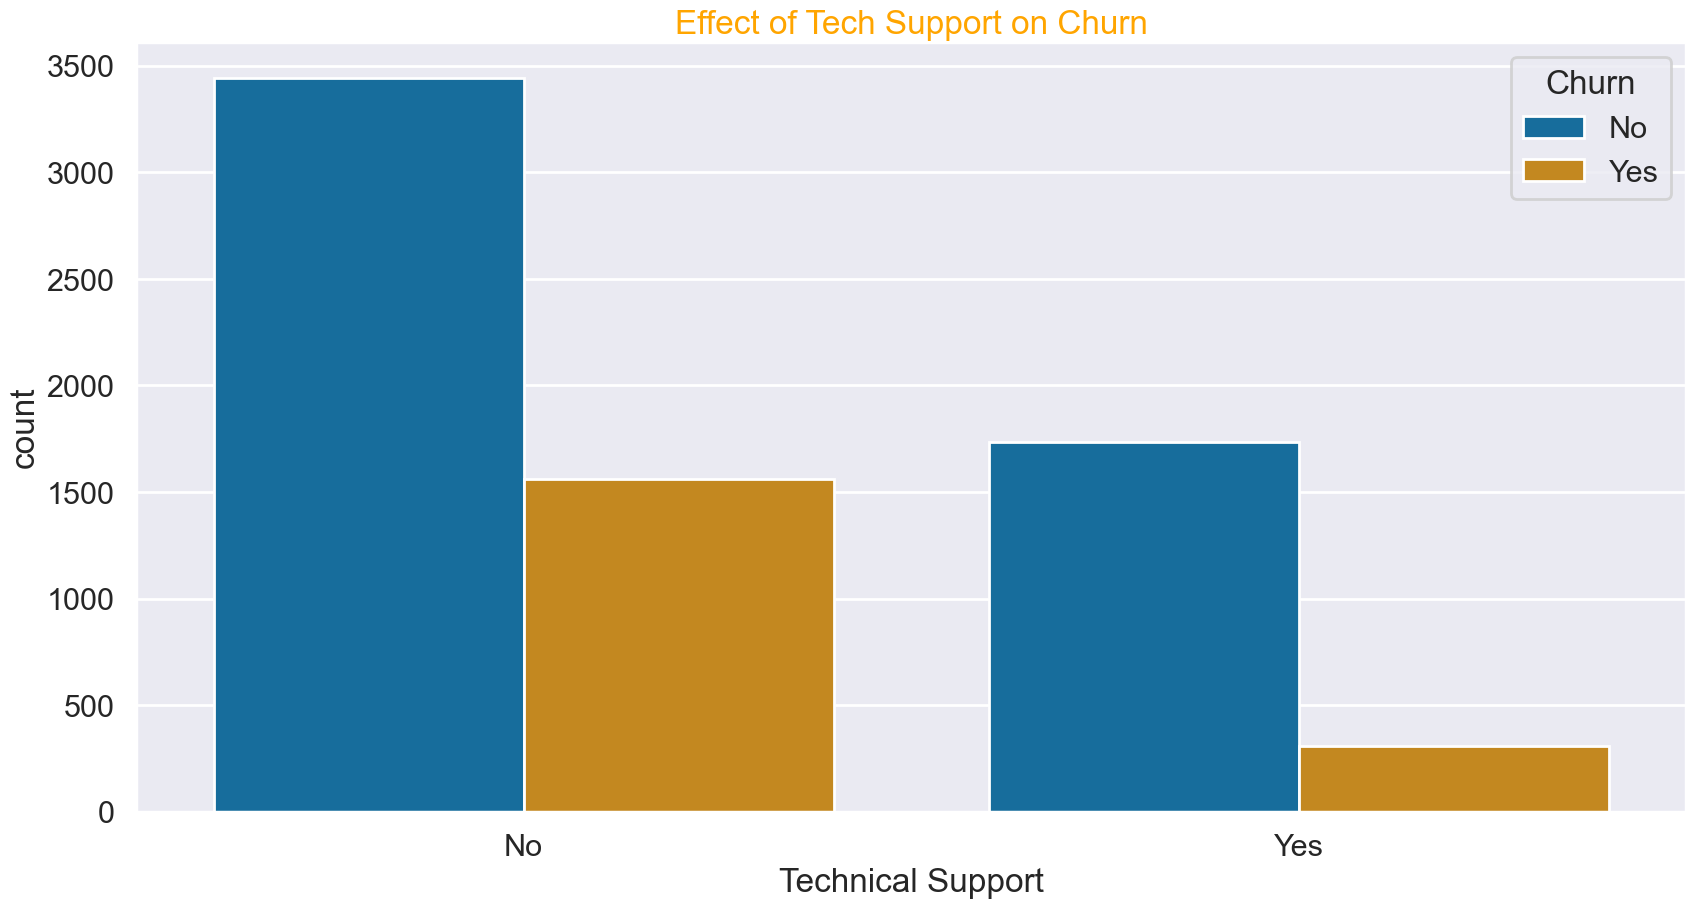

In [22]:
plt.figure(figsize=(20,10))
plt.title('Effect of Tech Support on Churn',fontdict={'color':'orange'})
plt.xlabel("Technical Support")
sns.countplot(x=data['TechSupport'],hue=data['Churn'],palette='colorblind');

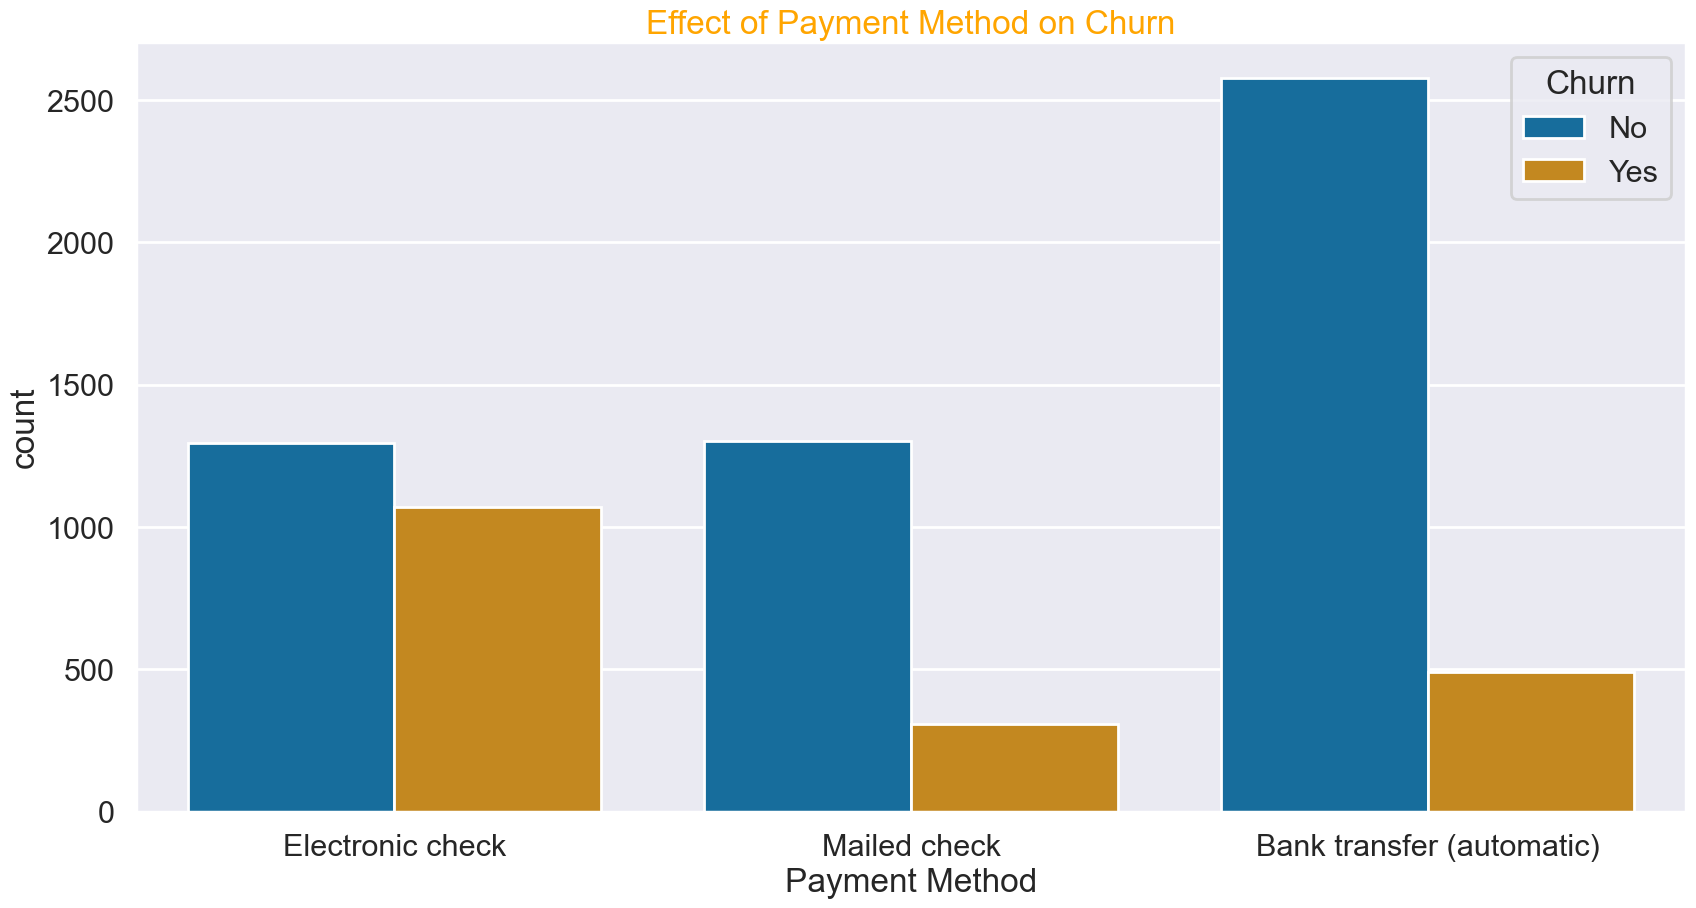

In [76]:
plt.figure(figsize=(20,10))
plt.title('Effect of Payment Method on Churn',fontdict={'color':'orange'})
plt.xlabel("Payment Method")
sns.countplot(x=data['PaymentMethod'],hue=data['Churn'],palette='colorblind');